In [1]:
pip install cdlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from cdlib import algorithms, viz
import networkx as nx
import matplotlib.pyplot as plt
import networkx.algorithms.link_prediction as link_prediction
import pandas as pd
import numpy as np

Note: to be able to use all crisp methods, you need to install some additional packages:  {'karateclub', 'wurlitzer', 'leidenalg', 'graph_tool', 'infomap'}
Note: to be able to use all overlapping methods, you need to install some additional packages:  {'ASLPAw', 'karateclub'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'leidenalg', 'wurlitzer', 'infomap'}


# **Season**

## **Importação**

In [3]:
S1 =pd.read_csv('/content/drive/MyDrive/got-s1-edges_semanas7_8.csv', sep=',')
Grafo_Temporada1 = nx.from_pandas_edgelist(S1, source='Source', target= 'Target', edge_attr= 'Weight')

In [4]:
S8 =pd.read_csv('/content/drive/MyDrive/got-s8-edges_semanas7_8.csv', sep=',')
Grafo_Temporada8 = nx.from_pandas_edgelist(S8, source='Source', target= 'Target', edge_attr= 'Weight')

### (Tarefa 1) Discuta quais as principais diferenças entre ambas as redes com base na distribuição de graus dos vértices (apresente os gráficos de histograma), grau médio, densidade e transitividade. Para estas três medidas, apresente os valores obtidos durante a discussão.

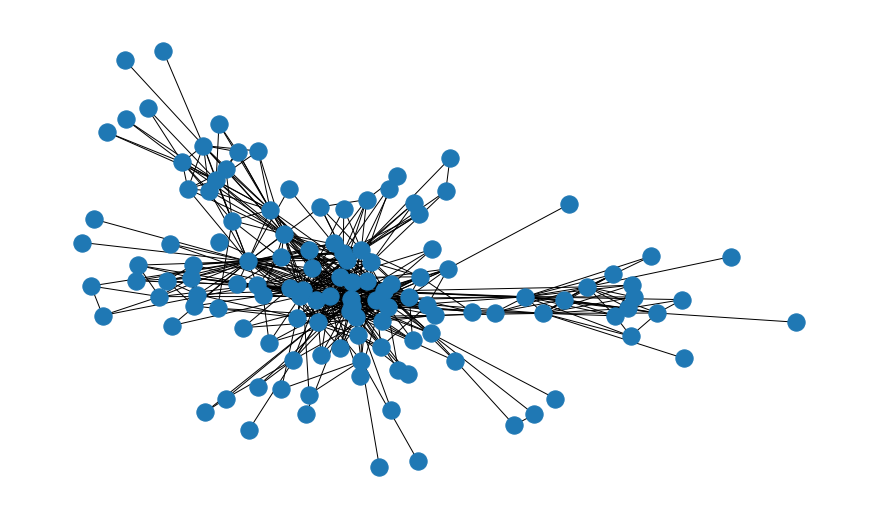

In [35]:
plt.figure(figsize=(12, 7))
nx.draw(Grafo_Temporada1)

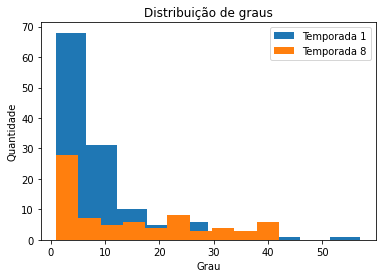

In [36]:
graus_S1 = [v for k, v in Grafo_Temporada1.degree()]
graus_S8 = [v for k, v in Grafo_Temporada8.degree()]
fig = plt.figure();
plt.hist(graus_S1)
plt.hist(graus_S8)
plt.title("Distribuição de graus")
plt.ylabel("Quantidade")
plt.xlabel("Grau")
plt.legend(['Temporada 1', 'Temporada 8'])

In [37]:
print('Grau médio da Temporada 1: ', np.mean(graus_S1))
print('Grau médio da Temporada 8: ', np.mean(graus_S8))

Grau médio da Temporada 1:  8.714285714285714
Grau médio da Temporada 8:  14.945945945945946


In [38]:
print('Densidade da Temporada 1:', nx.density(Grafo_Temporada1))
print('Densidade da Temporada 8:', nx.density(Grafo_Temporada8))

Densidade da Temporada 1: 0.06971428571428571
Densidade da Temporada 8: 0.20473898556090336


In [39]:
print('Transitividade da Temporada 1:', nx.transitivity(Grafo_Temporada1))
print('Transitividade da Temporada 8:', nx.transitivity(Grafo_Temporada8))

Transitividade da Temporada 1: 0.38325183374083127
Transitividade da Temporada 8: 0.6441837028505615


### (Tarefa 2) Para cada uma das redes, identifique quem são os 3 personagens mais centrais de acordo com as medidas de centralidade de grau, intermediação, proximidade e autovetor. Algum destes personagens é central em ambas as temporadas?

In [40]:
maior_caminho = -1
for i in Grafo_Temporada1:
    for j in Grafo_Temporada1:
        if i != j:
            try:
                tamanho_caminho = nx.shortest_path_length(Grafo_Temporada1,i,j)
                if tamanho_caminho > maior_caminho:
                    maior_caminho = tamanho_caminho
                    personagem1 = i
                    personagem2 = j
            except nx.NetworkXNoPath:
                pass

In [41]:
print(f'Os personagens mais distantes da Temporada 1 são {personagem1} e {personagem2}, e o custo do caminho é {maior_caminho}')
print('O caminho é composto por: ', nx.shortest_path(Grafo_Temporada1, personagem1, personagem2))

Os personagens mais distantes da Temporada 1 são IROGENIA e MELESSA, e o custo do caminho é 6
O caminho é composto por:  ['IROGENIA', 'DOREAH', 'DAENERYS', 'NED', 'JON', 'SAM', 'MELESSA']


In [42]:
maior_caminho = -1
for i in Grafo_Temporada8:
    for j in Grafo_Temporada8:
        if i != j:
            try:
                tamanho_caminho = nx.shortest_path_length(Grafo_Temporada8,i,j)
                if tamanho_caminho > maior_caminho:
                    maior_caminho = tamanho_caminho
                    personagem1 = i
                    personagem2 = j
            except nx.NetworkXNoPath:
                pass

In [43]:
print(f'Os personagens mais distantes da Temporada 2 são {personagem1} e {personagem2}, e o custo do caminho é {maior_caminho}')
print('O caminho é composto por: ', nx.shortest_path(Grafo_Temporada8, personagem1, personagem2))

Os personagens mais distantes da Temporada 2 são ALANNA e WILLIAM, e o custo do caminho é 6
O caminho é composto por:  ['ALANNA', 'OWEN', 'ARYA', 'TYRION', 'BRONN', 'CRAYAH', 'WILLIAM']


### (Tarefa 3) Execute o mesmo algoritmo de detecção de comunidades (de sua preferência) nas redes das duas temporadas. Apresente o grafo com os vértices coloridos de acordo com as comunidades encontradas e com os nomes dos vértices para sua identificação. O número de comunidades é o mesmo em ambos os casos? A partir de uma análise visual, é possível identificar uma comunidade similar (em termos de personagens) em ambas as temporadas?

In [16]:
pos = nx.spring_layout(Grafo_Temporada1)

In [46]:
 pos8 = nx.spring_layout(Grafo_Temporada8)

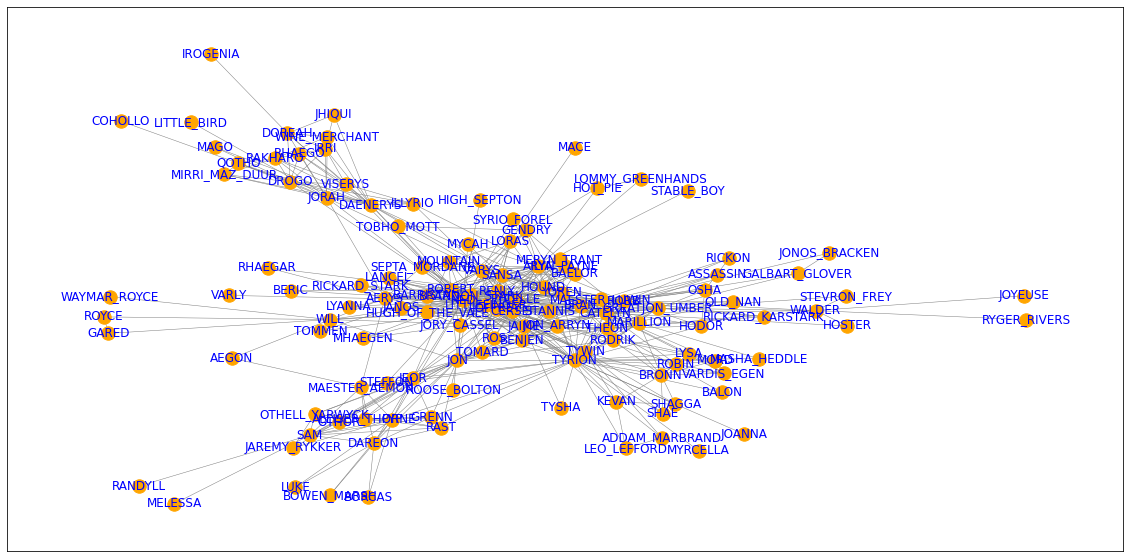

In [48]:
 plt.figure(figsize=(20,10))
 nx.draw_networkx(Grafo_Temporada1, pos, with_labels=True, node_size=180, node_color='Orange', edge_color='Gray', width = 0.5, font_color='Blue')

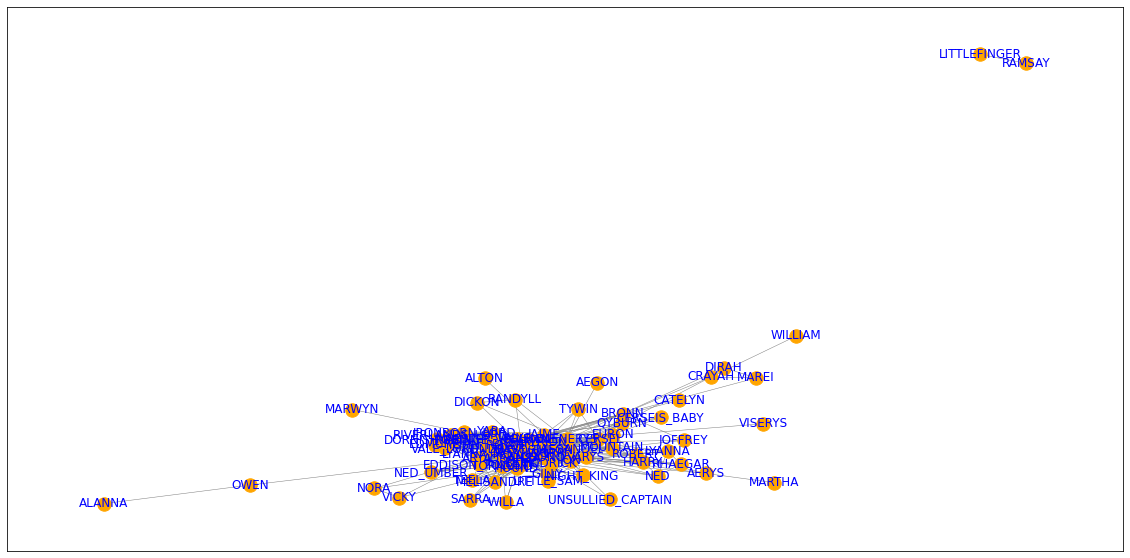

In [51]:
plt.figure(figsize=(20,10))
nx.draw_networkx(Grafo_Temporada8, pos8, with_labels=True, node_size=180, node_color='Orange', edge_color='Gray', width = 0.5, font_color='Blue')

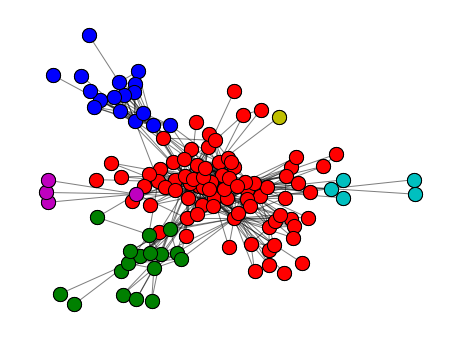

In [54]:
comunidades = algorithms.girvan_newman(Grafo_Temporada1, level=5)
viz.plot_network_clusters(Grafo_Temporada1, comunidades, pos, figsize=(8,6))

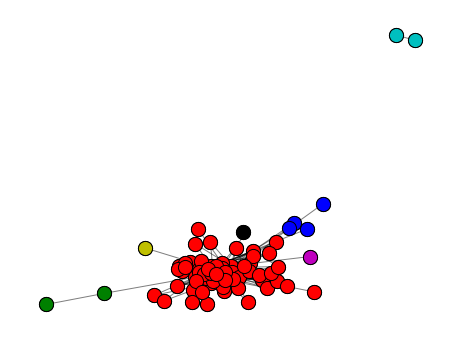

In [58]:
comunidadess = algorithms.girvan_newman(Grafo_Temporada8, level=5)
viz.plot_network_clusters(Grafo_Temporada8, comunidadess, pos8, figsize=(8,6))

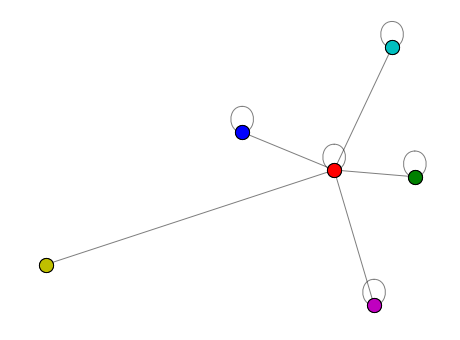

In [60]:
viz.plot_community_graph(Grafo_Temporada1, comunidades, figsize=(8,6))

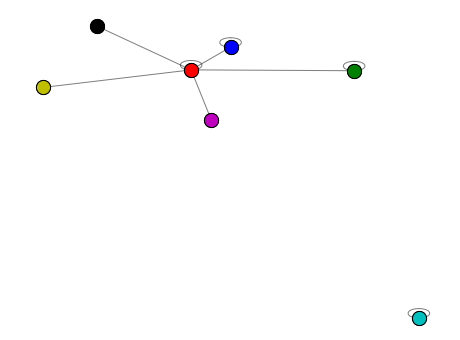

In [59]:
viz.plot_community_graph(Grafo_Temporada8, comunidadess, figsize=(8,6))

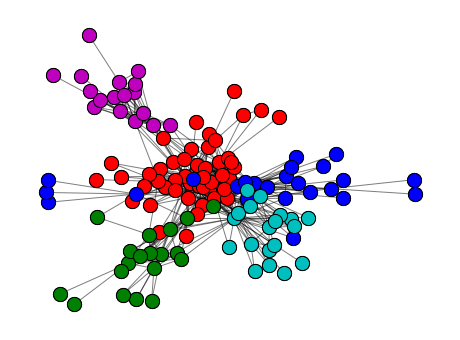

In [20]:
comunidades2 = algorithms.louvain(Grafo_Temporada1)
viz.plot_network_clusters(Grafo_Temporada1, comunidades2, pos, figsize=(8,6))

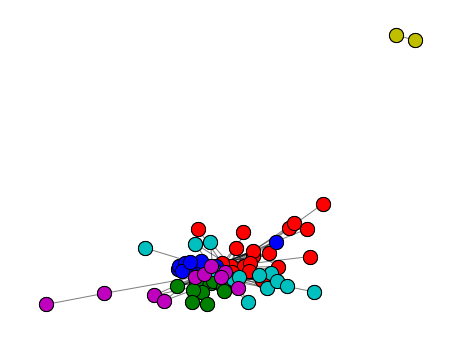

In [61]:
comunidadess2 = algorithms.louvain(Grafo_Temporada8)
viz.plot_network_clusters(Grafo_Temporada8, comunidadess2, pos8, figsize=(8,6))

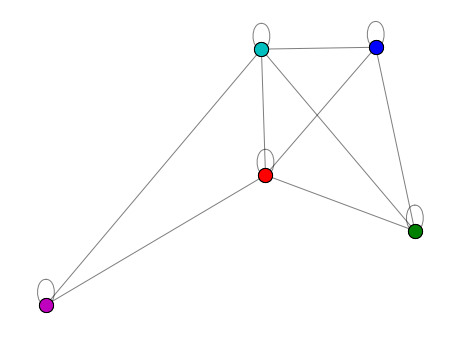

In [21]:
viz.plot_community_graph(Grafo_Temporada1, comunidades2, figsize=(8,6))

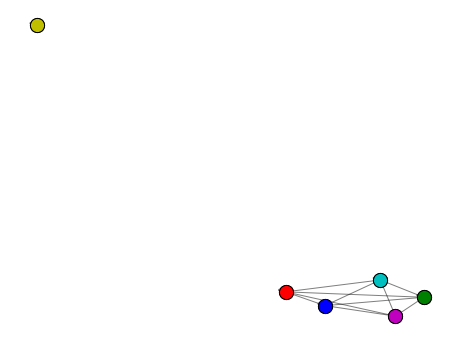

In [62]:
viz.plot_community_graph(Grafo_Temporada8, comunidadess2, figsize=(8,6))

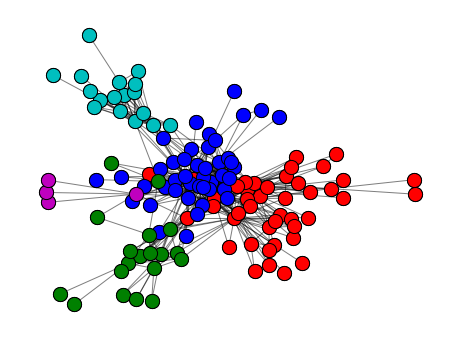

In [22]:
comunidades3 = algorithms.greedy_modularity(Grafo_Temporada1)
viz.plot_network_clusters(Grafo_Temporada1, comunidades3, pos, figsize=(8,6))

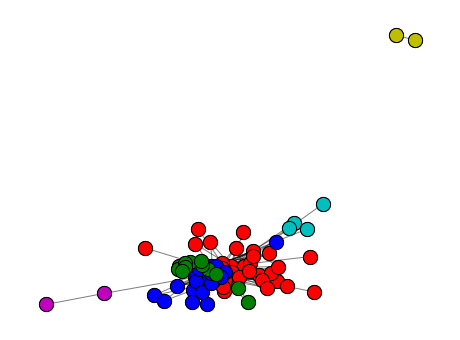

In [64]:
comunidadess3 = algorithms.greedy_modularity(Grafo_Temporada8)
viz.plot_network_clusters(Grafo_Temporada8, comunidadess3, pos8, figsize=(8,6))

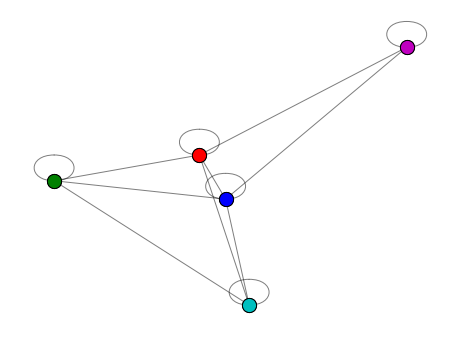

In [23]:
viz.plot_community_graph(Grafo_Temporada1, comunidades3, figsize=(8,6))

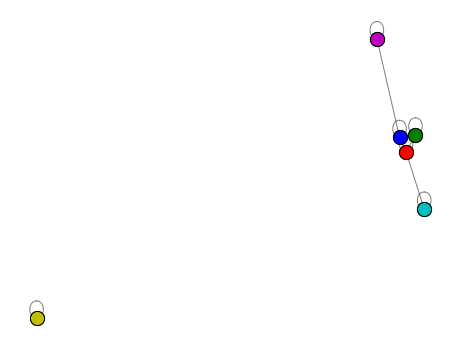

In [65]:
viz.plot_community_graph(Grafo_Temporada8, comunidadess3, figsize=(8,6))

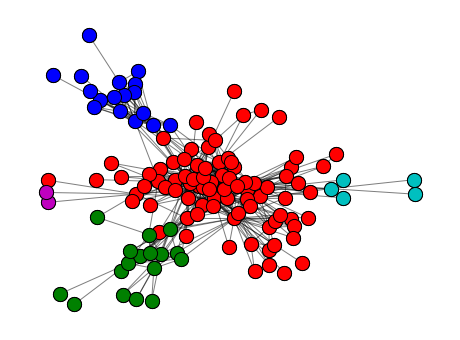

In [24]:
comunidades4 = algorithms.label_propagation(Grafo_Temporada1)
viz.plot_network_clusters(Grafo_Temporada1, comunidades4, pos, figsize=(8,6))

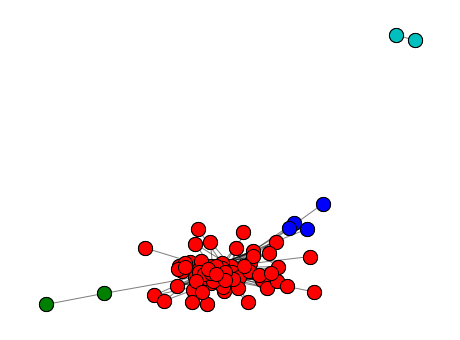

In [68]:
comunidadess4 = algorithms.label_propagation(Grafo_Temporada8)
viz.plot_network_clusters(Grafo_Temporada8, comunidadess4, pos8, figsize=(8,6))

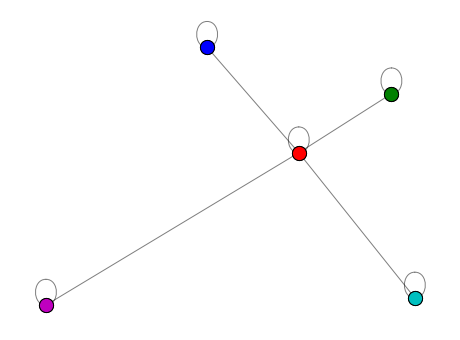

In [25]:
viz.plot_community_graph(Grafo_Temporada1, comunidades4, figsize=(8,6))

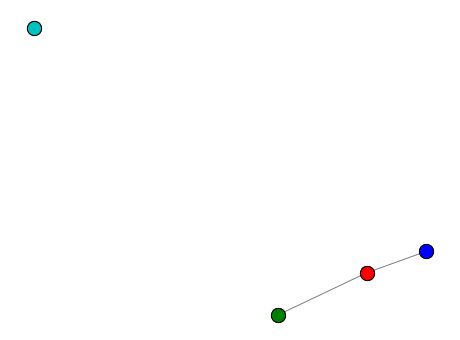

In [70]:
viz.plot_community_graph(Grafo_Temporada8, comunidadess4, figsize=(8,6))